# US fx To Ksh

## Introduction


## Objectives

You will be able to:

* Load time series data using Pandas and perform time series indexing 
* Perform data cleaning operation on time series data 
* Change the granularity of a time series 
* Describe pandas' Timestamp and Datetime datatypes 
* Explore the temporal structure of time series with line plots 
* Construct and interpret time series histogram and density plots 
* Create a time series heatmap 


## Loading Time Series Data

To get a sense of how to manipulate time series data, we'll walk through an example. The dataset we'll load contains Kes against the US fx from 1970-223. The data is stored in a CSV file

In [31]:
# Import LIbrares
import numpy as np
import pandas as pd

# Visualization LIbraries
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load the dataset
fx_data = pd.read_csv('usd.csv')
euro_data = pd.read_csv('euro.csv')
gbp_data = pd.read_csv('gbp.csv')

fx_data = pd.merge(pd.merge(fx_data, euro_data, on='Date'), gbp_data, on='Date')

# Rename columns
fx_data = fx_data.rename(columns={'Buy_x':'USD_Buy', 'Sell_x':'USD_Sell',
                                      'Buy_y':'EURO_Buy', 'Sell_y':'EURO_Sell', 
                                      'Buy':'GBP_Buy', 'Sell':'GBP_Sell' })

# Drop columns
fx_data = fx_data.drop(['Currency_x','Mean_x','Currency_y','Mean_y',
                            'Currency','Mean'], axis=1)

fx_data

,Date,USD_Buy,USD_Sell,EURO_Buy,EURO_Sell,GBP_Buy,GBP_Sell
0,07/03/2024,142.0717,NaN,154.6024,NaN,180.7649,NaN
1,06/03/2024,142.8287,NaN,154.9977,NaN,181.4353,NaN
2,05/03/2024,143.8251,NaN,156.1078,NaN,182.4421,NaN
3,04/03/2024,143.8630,NaN,156.0050,NaN,182.1809,NaN
4,01/03/2024,143.5182,NaN,155.6455,NaN,181.7514,NaN
...,...,...,...,...,...,...,...
10020,12/09/2004,84.2250,84.4167,105.2955,105.5656,132.9731,133.2883
10021,12/09/2004,84.2250,84.4167,105.2955,105.5656,132.9731,133.2883
10022,12/09/2004,84.2250,84.4167,105.2955,105.5656,132.9731,133.2883
10023,12/09/2003,84.0539,84.2428,105.6726,105.9217,133.3445,133.6634


Now, let's look at the information in our dataset: 

In [33]:
# Investigate the dataset
fx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10025 entries, 0 to 10024
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10025 non-null  object 
 1   USD_Buy    10025 non-null  float64
 2   USD_Sell   9980 non-null   float64
 3   EURO_Buy   10025 non-null  float64
 4   EURO_Sell  9980 non-null   float64
 5   GBP_Buy    10025 non-null  float64
 6   GBP_Sell   9980 non-null   float64
dtypes: float64(6), object(1)
memory usage: 548.4+ KB


In [21]:
"""
# Create a new column called spread
fx_data = fx_data.eval("Spread = Sell - Buy")
fx_data.head()
"""

'\n# Create a new column called spread\nfx_data = fx_data.eval("Spread = Sell - Buy")\nfx_data.head()\n'

While working with time series data in Python, two things can make your life easier: 

- Dates are in the index of the DataFrame (helps you with plotting)
- The columns are understood by Python as true "date" classes 

To ensure dates are understood correctly, you can use Pandas' `Timestamp` or base Python’s `Datetime` types; and they are interchangeable in most cases. It’s the type used for the entries that make up a `DatetimeIndex`, and other time series oriented data structures in Pandas. Further details on Timestamp can be found [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html).

We need to do two things now: 

1. Make sure that we change the dates in our dataset from "non-null object" to "non-null datetime" (i.e., change the data type of dates). This can be done using the `to_datetime()` function from Pandas. To make sure Python understands the date correctly, a `format` argument can be passed [as specified in the documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#providing-a-format-argument).
2. Ensure the date becomes the index. 

In [34]:
# Convert Date to a datetime column
fx_data['Date'] = pd.to_datetime(fx_data['Date'], format='%d/%m/%Y')

In [35]:
# Investigate the new dataframe
fx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10025 entries, 0 to 10024
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10025 non-null  datetime64[ns]
 1   USD_Buy    10025 non-null  float64       
 2   USD_Sell   9980 non-null   float64       
 3   EURO_Buy   10025 non-null  float64       
 4   EURO_Sell  9980 non-null   float64       
 5   GBP_Buy    10025 non-null  float64       
 6   GBP_Sell   9980 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 548.4 KB


In [36]:
# Make Date the index 
fx_data.set_index('Date', inplace=True)

In [37]:
# Confirm the change
fx_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10025 entries, 2024-03-07 to 1970-01-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USD_Buy    10025 non-null  float64
 1   USD_Sell   9980 non-null   float64
 2   EURO_Buy   10025 non-null  float64
 3   EURO_Sell  9980 non-null   float64
 4   GBP_Buy    10025 non-null  float64
 5   GBP_Sell   9980 non-null   float64
dtypes: float64(6)
memory usage: 548.2 KB


In [38]:
fx_data = fx_data.sort_values(by='Date')

In [39]:
# Investigate the head
fx_data.head(15)

,USD_Buy,USD_Sell,EURO_Buy,EURO_Sell,GBP_Buy,GBP_Sell
Date,,,,,,
1970-01-01,97.4105,102.1154,90.7153,95.1305,70.7970,74.2285
2003-09-12,84.0539,84.2428,105.6726,105.9217,133.3445,133.6634
2004-09-12,84.2250,84.4167,105.2955,105.5656,132.9731,133.2883
2004-09-12,84.2250,84.4167,105.2955,105.5656,132.9731,133.2883
2004-09-12,84.2250,84.4167,105.2955,105.5656,132.9731,133.2883
2004-09-12,84.2250,84.4167,105.2955,105.5656,132.9731,133.2883
2004-09-12,84.2250,84.4167,105.2955,105.5656,132.9731,133.2883
2004-09-12,84.2250,84.4167,105.2955,105.5656,132.9731,133.2883
2004-09-12,84.2250,84.4167,105.2955,105.5656,132.9731,133.2883


In [40]:
# Export the new df to csv
fx_data.to_csv('forex_data.csv')

## Resampling

### Downsampling

Did you notice that the date is now in the index!? Having the date as the index has several advantages, among others, easy visualization with dates on the x-axis, and the functionality to [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) the data. 

Pandas has a simple, powerful, and efficient functionality for performing resampling operations when converting the frequency conversion (e.g., converting monthly data into yearly data). This is very common in financial applications. 

In the following cell, we are using the `.resample()` method to change the frequency of the time series to monthly (using the string `'MS'`) and then calculating the monthly mean. 

In [33]:
# using the .resample() method to change the frequency of the time series to monthly
# then calculate the monthly mean.

fx_monthly = fx_data.resample('MS')
month_mean = fx_monthly.mean()

print(month_mean.tail(5))
print('*************************************************')
print(month_mean.head(5))

            Dollar_Buy  Dollar_Sell    Euro_Buy   Euro_Sell     GBP_Buy  \
Date                                                                      
2023-09-01  146.668948   146.868948  156.755776  157.021310  182.134871   
2023-10-01  149.297935   149.497790  157.638145  157.897770  181.713420   
2023-11-01  151.932486   152.132486  164.073348  164.339038  188.418467   
2023-12-01  153.862250   154.318950  167.714772  168.244889  194.674311   
2024-01-01  156.817633   157.649033  172.324500  173.304900  198.735867   

              GBP_Sell  
Date                    
2023-09-01  182.435176  
2023-10-01  182.006350  
2023-11-01  188.724086  
2023-12-01  195.286839  
2024-01-01  199.857233  
*************************************************
            Dollar_Buy  Dollar_Sell  Euro_Buy  Euro_Sell  GBP_Buy  GBP_Sell
Date                                                                       
1970-01-01     97.4105     102.1154   90.7153    95.1305   70.797   74.2285
1970-02-01         Na

In [37]:
# using the .resample() method to change the frequency of the time series to quarterly
# then calculate the quarterly mean.

fx_quarterly = fx_data.resample('Q')
quarter_mean = fx_quarterly.mean()

quarter_mean.tail(10)

,Dollar_Buy,Dollar_Sell,Euro_Buy,Euro_Sell,GBP_Buy,GBP_Sell
Date,,,,,,
2021-12-31,111.831184,112.031184,127.910250,128.168674,150.729129,151.031437
2022-03-31,113.704677,113.904630,127.617064,127.871836,152.545412,152.853111
2022-06-30,116.273020,116.472871,124.009314,124.279590,146.370968,146.665286
2022-09-30,119.313652,119.513559,120.239476,120.478505,140.542403,140.820075
2022-12-31,121.852377,122.052377,124.269812,124.512662,142.978062,143.255948
2023-03-31,126.389155,126.589155,135.574208,135.829295,153.521366,153.802202
2023-06-30,137.164653,137.364653,149.304563,149.566381,171.677251,171.974120
2023-09-30,143.946003,144.145869,156.638255,156.904585,182.286594,182.589925
2023-12-31,151.628159,151.906425,163.002866,163.347173,188.054132,188.449083


### Upsampling

In some cases, it is useful to create upsampled time series as well, especially if you're trying to merge several time series with different frequencies. You can do this by using the `.resample()` method with an interval that is more frequent than the timestamp from the original time series. 

In the following cell, we change the frequency of the data to 12 hours (using thr string `'12H'`) and then chain the `.asfreq()` method to return the resulting data. 

In [38]:
# Check for duplicates
print(fx_data.index.duplicated().any())

True


In [39]:
# Make a copy of the df
new_df = fx_data.copy()

# Handle duplicate indices (if any)
new_df = new_df.groupby(level=0).mean()

fx_bidaily = new_df.resample('12H').asfreq()
fx_bidaily.head()

,Dollar_Buy,Dollar_Sell,Euro_Buy,Euro_Sell,GBP_Buy,GBP_Sell
Date,,,,,,
1970-01-01 00:00:00,97.4105,102.1154,90.7153,95.1305,70.797,74.2285
1970-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


As you can see, these new timestamps all have missing values in the resulting data. One of the common ways around this is to fill the current missing value with a previous valid one. To do this, you can use the `.ffill()` method as shown below: 

In [40]:
fx_bidaily_fill = fx_bidaily.ffill()
fx_bidaily_fill.tail()

,Dollar_Buy,Dollar_Sell,Euro_Buy,Euro_Sell,GBP_Buy,GBP_Sell
Date,,,,,,
2024-01-02 00:00:00,156.5000,157.4706,173.0841,174.2159,199.2018,200.4976
2024-01-02 12:00:00,156.5000,157.4706,173.0841,174.2159,199.2018,200.4976
2024-01-03 00:00:00,156.9529,157.6941,172.1359,173.0188,198.5876,199.6006
2024-01-03 12:00:00,156.9529,157.6941,172.1359,173.0188,198.5876,199.6006
2024-01-04 00:00:00,157.0000,157.7824,171.7535,172.6800,198.4182,199.4735


## Selecting and slicing time series data

Pandas carries the ability to handle date stamp indices allowing quick and handy way of slicing data. For example, we can slice our dataset to only retrieve data points that come after the year 1985: 

In [42]:
fx_2013_onwards = new_df['2013':]
print(fx_2013_onwards.head())
print('\n************************\n')
print(fx_2013_onwards.tail())

            Dollar_Buy  Dollar_Sell  Euro_Buy  Euro_Sell   GBP_Buy  GBP_Sell
Date                                                                        
2013-01-02     85.9789      86.1750  114.0790   114.3483  140.3541  140.6641
2013-01-03     86.2667      86.4472  113.3280   113.5744  139.8998  140.2038
2013-01-04     86.3500      86.5333  112.5956   112.8450  138.8291  139.1441
2013-01-07     86.3306      86.5222  112.5244   112.7867  138.3614  138.7418
2013-01-08     86.3917      86.5633  113.3893   113.6439  139.1141  139.4431

************************

            Dollar_Buy  Dollar_Sell  Euro_Buy  Euro_Sell   GBP_Buy  GBP_Sell
Date                                                                        
2023-12-28    155.6588     156.5294  172.1394   173.1600  198.3735  199.5565
2023-12-29    156.0118     156.9118  173.2518   174.3076  199.1971  200.4124
2024-01-02    156.5000     157.4706  173.0841   174.2159  199.2018  200.4976
2024-01-03    156.9529     157.6941  172.1359   1

In [47]:
# Filter the data for each year
# Show the first and last month per year
filtered_data = fx_data.groupby(fx_data.index.year).apply(lambda x: x.iloc[[-1, 0]])

# Calculate the running difference for the 'Sell' column
filtered_data[['Dollar_Diff','Euro_Diff', 'GBP_Diff']] = filtered_data[['Dollar_Sell',
                                                            'Euro_Sell','GBP_Sell']].diff()

# Display the resulting DataFrame
filtered_data

Dollar_Buy  Dollar_Sell  Euro_Buy  Euro_Sell   GBP_Buy  \
Date Date                                                                 
1970 1970-01-01     97.4105     102.1154   90.7153    95.1305   70.7970   
     1970-01-01     97.4105     102.1154   90.7153    95.1305   70.7970   
2003 2003-09-12     84.0539      84.2428  105.6726   105.9217  133.3445   
     2003-09-12     84.0539      84.2428  105.6726   105.9217  133.3445   
2004 2004-09-12     84.2250      84.4167  105.2955   105.5656  132.9731   
     2004-12-31     77.2444      77.4444  105.1870   105.4740  148.7850   
2005 2005-01-03     78.8278      79.0278  105.9880   106.2810  150.1600   
     2005-12-30     72.2667      72.4667   85.7788    86.0431  124.7930   
2006 2006-01-03     72.3111      72.5111   85.9781    86.2647  125.0480   
     2006-12-29     69.3300      69.4633   91.2873    91.4872  136.1700   
2007 2007-01-02     69.5189      69.6522   91.9787    92.1777  136.6250   
     2007-12-20     62.4744      62.6078   89.7227    89.9830  124.6340   
2008 2008-01-02     63.3214      63.4786   92.7143    93.1086  125.8330   
     2008-12-31     77.6333      77.7889  109.3570   109.6080  112.2590   
2009 2009-01-02     78.1944      78.3411  108.4290   108.6430  114.6020   
     2009-12-31     75.7194      75.9206  108.7820   109.0880  121.7160   
2010 2010-01-04     75.7378      75.9433  108.3410   108.6560  121.9600   
     2010-12-31     80.6767      80.8272  107.5090   107.7470  124.6300   
2011 2011-01-03     80.7239      80.8683  107.3070   107.5640  125.5190   
     2011-12-30     84.9278      85.2083  109.8730   110.2470  130.8970   
2012 2012-01-03     84.9639      85.2172  110.2220   110.5800  132.1420   
     2012-12-31     85.9383      86.1189  113.4250   113.6906  138.8741   
2013 2013-01-02     85.9789      86.1750  114.0790   114.3483  140.3541   
     2013-12-31     86.2139      86.4056  119.1178   119.3287  142.2094   
2014 2014-01-02     86.3222      86.5111  118.6617   118.9401  142.5506   
     2014-12-31     90.5311      90.6644  110.0811   110.2606  140.8261   
2015 2015-01-02     90.6239      90.7822  109.2844   109.4983  140.8611   
     2015-12-31    102.2139     102.4088  111.6694   111.8972  151.6378   
2016 2016-01-04    102.1978     102.3918  111.6044   111.8378  151.5261   
     2016-12-30    102.3872     102.5844  106.9444   107.1767  125.2800   
2017 2017-01-03    102.4628     102.6628  108.0467   108.2917  126.3850   
     2017-12-29    103.1317     103.3317  123.1467   123.4128  138.6028   
2018 2018-01-02    103.1944     103.3944  123.7200   123.9928  139.5017   
     2018-12-31    101.7461     101.9461  116.3122   116.5806  128.8706   
2019 2019-01-02    101.7322     101.9322  116.2856   116.5361  129.3106   
     2019-12-31    101.2365     101.4365  113.2441   113.4918  132.7947   
2020 2020-01-02    101.2429     101.4429  113.4376   113.6900  133.1629   
     2020-12-31    109.0718     109.2718  133.7594   134.0306  148.2054   
2021 2021-01-04    109.1165     109.3165  134.0429   134.3129  148.9159   
     2021-12-31    113.0412     113.2412  127.8653   128.1212  151.9024   
2022 2022-01-03    113.0382     113.2382  127.9594   128.2200  152.1853   
     2022-12-30    123.2735     123.4735  131.1400   131.3906  148.3253   
2023 2023-01-03    123.3235     123.5235  131.5300   131.7847  148.5900   
     2023-12-29    156.0118     156.9118  173.2518   174.3076  199.1971   
2024 2024-01-02    156.5000     157.4706  173.0841   174.2159  199.2018   
     2024-01-04    157.0000     157.7824  171.7535   172.6800  198.4182   

                 GBP_Sell  Dollar_Diff  Euro_Diff  GBP_Diff  
Date Date                                                    
1970 1970-01-01   74.2285          NaN        NaN       NaN  
     1970-01-01   74.2285       0.0000     0.0000    0.0000  
2003 2003-09-12  133.6634     -17.8726    10.7912   59.4349  
     2003-09-12  133.6634       0.0000     0.0000    0.0000  
2004 2004-09-12  133.2883       0.1739    -0

## Missing Data

It's pretty common for a time series dataset to have missing values as real-world data tends to be messy and imperfect. The simplest way to detect missing values is either plotting the data and identifying disjoint areas of time series, or by using a combination of `.isnull()` and `.sum()` methods:  

In [48]:
fx_data.isnull().sum()

Dollar_Buy     0
Dollar_Sell    0
Euro_Buy       0
Euro_Sell      0
GBP_Buy        0
GBP_Sell       0
dtype: int64

In this case, there is no missing data. When data are missing, they can be handled in a multitude of ways: 
* Drop the data elements with missing values (this may result in low accuracy and loss of valuable information)
* Fill in the missing values under a defined criteria 
* Use advanced machine learning methods to predict the missing values 

In general, the `.fillna()` method can be used along with methods like `.bfill()` of `.ffill()` as an argument/criterion for filling in missing values . `.bfill()` (backward filling) looks for the next valid entry in the time series and fills the gaps with this value. Similarly, `.ffill()` can be used to copy forward the previous valid entry of the time series (as demonstrated above). 

## Visualizing time series data

Visualizations play an important role in time series analysis. Time series data naturally lends itself to visualization techniques for identifying rises, falls, trends, and noise, etc. Plotting raw time series allows data diagnostics to identify certain trends or events.

In what follows, we'll use a dataset downloaded from [Qlik DataMarket](https://www.qlik.com/us/products/qlik-data-market). The dataset contains information on the average monthly returns of the NYSE between 1961 and 1966. 

## Time series line plot

Line plots are the most common technique for visualizing time series data as they can clearly show changes over time. Using the convention, time is shown on the x-axis with the observation values along the y-axis.

Let's use the simple `.plot()` method to draw the line graph for the `nyse` series. 

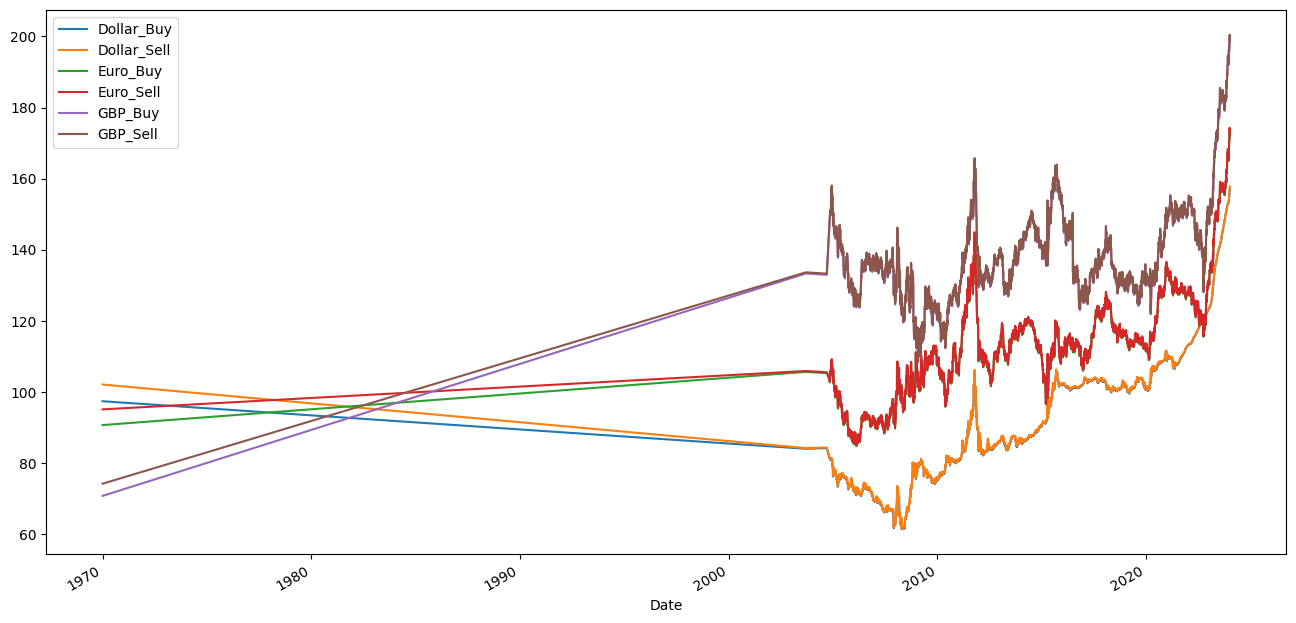

In [49]:
# Draw a line plot using usd and .plot() method 
import matplotlib.pyplot as plt
%matplotlib inline

new_df.plot(figsize = (16,8));

## Time series dot plot

For some time series, you may want to change the style of a line plot for a more refined visualization with a higher resolution of events. These time series are not very dense so it might be useful to change from a continuous line to dots because this representation might be misleading. 
You can change the continuous line to dots, each representing one entry in the time series. This can be achieved by changing the `style` parameter of the line plot. Let's pass `style='.b'` as an argument to `.plot()` method.

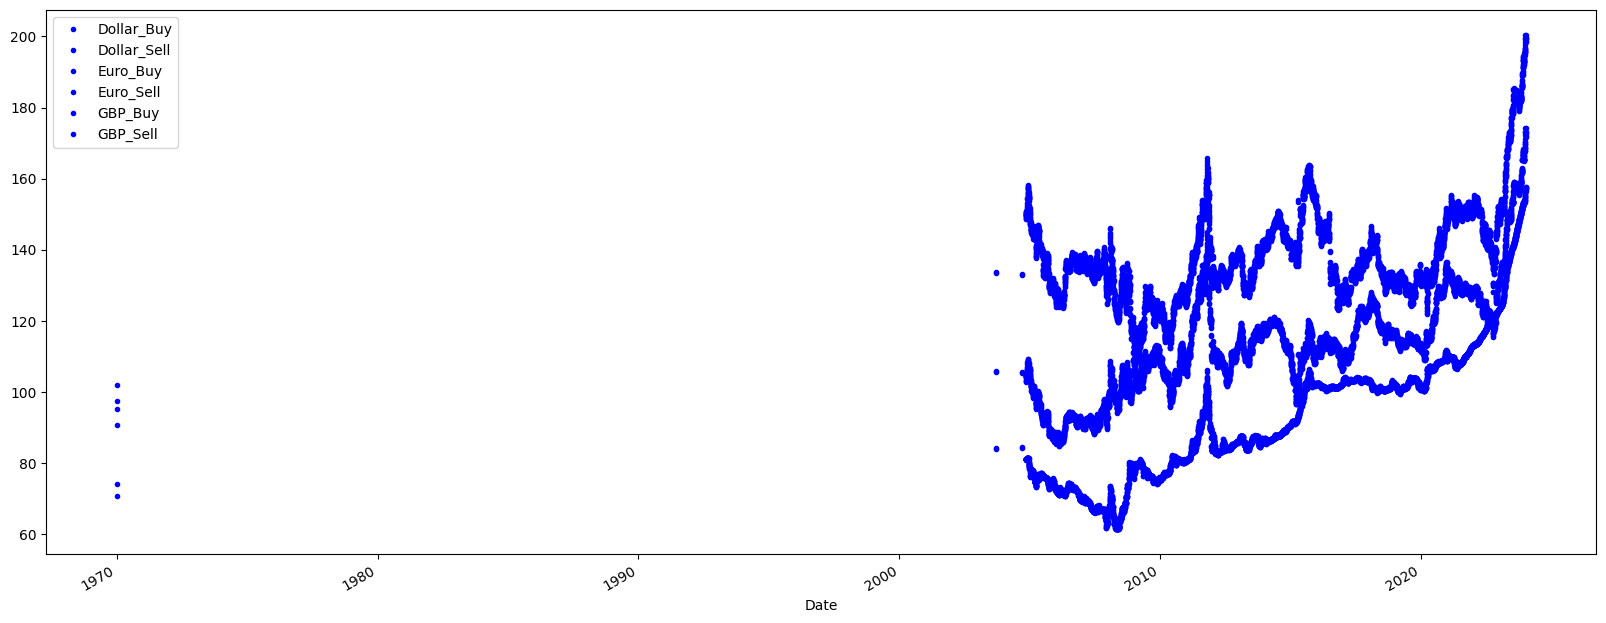

In [50]:
# Draw a dot plot using temp and .plot() method 
new_df.plot(figsize = (20,8), style = '.b');

It's not a surprise to see that the general pattern looks very much similar to the line plot, however, we can identify some outliers that represent very low and very high return months. Dot plots can prove to be very helpful in identifying outliers and very small patterns which may not be so obvious otherwise. 

In the dataset, the NYSE returns span 6 years. We can group data by year and create a line plot for each year for direct comparison.

## Grouping and Visualizing Time Series Data

Now, we'll look at how a time series can be regrouped for a given time interval, i.e. weekly/monthly/yearly average values and compare them to identify any changes taking place over time. We'll use the Pandas' [`grouper()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Grouper.html) function in conjunction with the `.groupby()` method to achieve this. 



> The list of aliases for time series frequencies can be found [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases).


In [51]:
# Use pandas grouper to group values using annual frequency
year_groups = new_df.groupby(pd.Grouper(freq ='A'))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

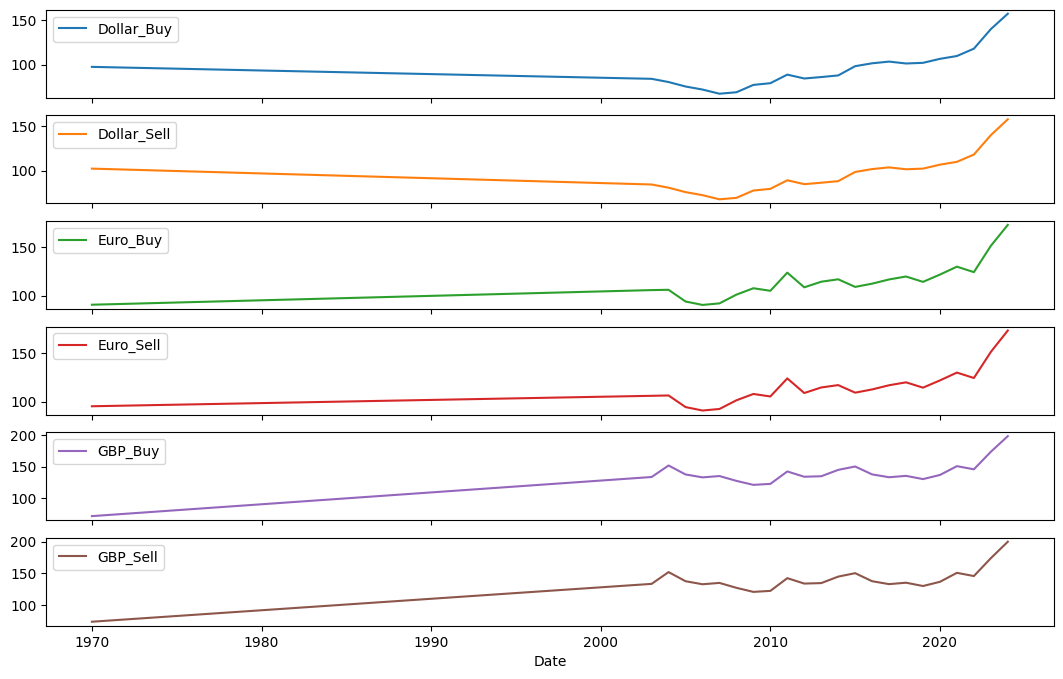

In [52]:
# Group by year
year_groups = new_df.groupby(new_df.index.year)

# Group by year and take the mean within each group
fx_annual = new_df.groupby(new_df.index.year).mean()

# Plot the yearly groups as subplots
fx_annual.plot(figsize=(13, 8), subplots=True, legend=True)

We can see 6 subplots, one for each year. Each plot is 12 months in length following the annual frequency.

In some cases, it may also be a good idea to plot these groups in an overlapping manner for a direct comparison. Disabling subplots can help us achieve this.

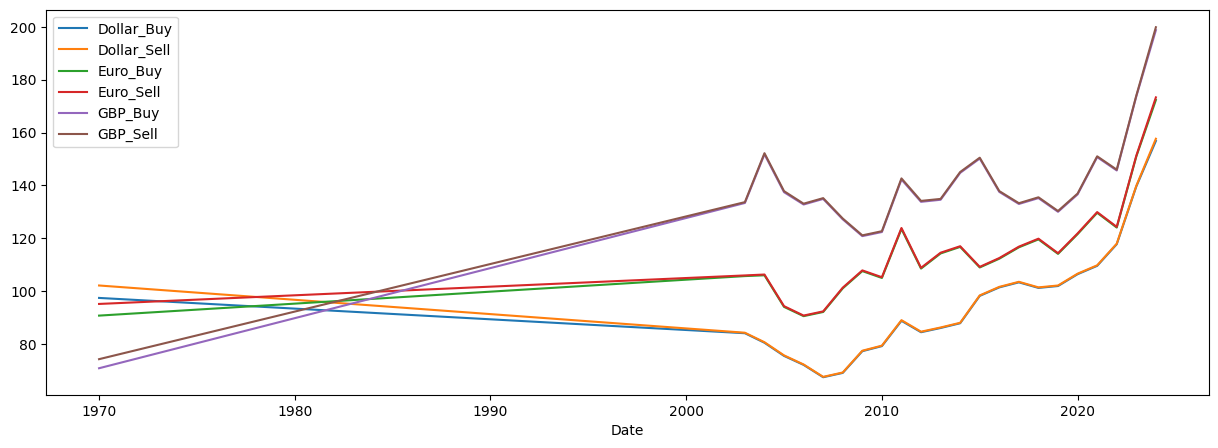

In [53]:
# Plot overlapping yearly groups 
fx_annual.plot(figsize = (15,5), subplots=False, legend=True);

## Time Series Histogram and Density Plots

Most linear time series forecasting methods assume a well-behaved distribution of observations e.g. a normal distribution. This can be explicitly checked using tools like statistical hypothesis tests we saw during hypothesis testing exercises. Visualizing these distributions can provide a useful first check of the distribution of observations both on raw observations and after any type of data transformation has been performed.

We will now create a histogram plot of the observations in the dataset using the `.hist()` method. 

> A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

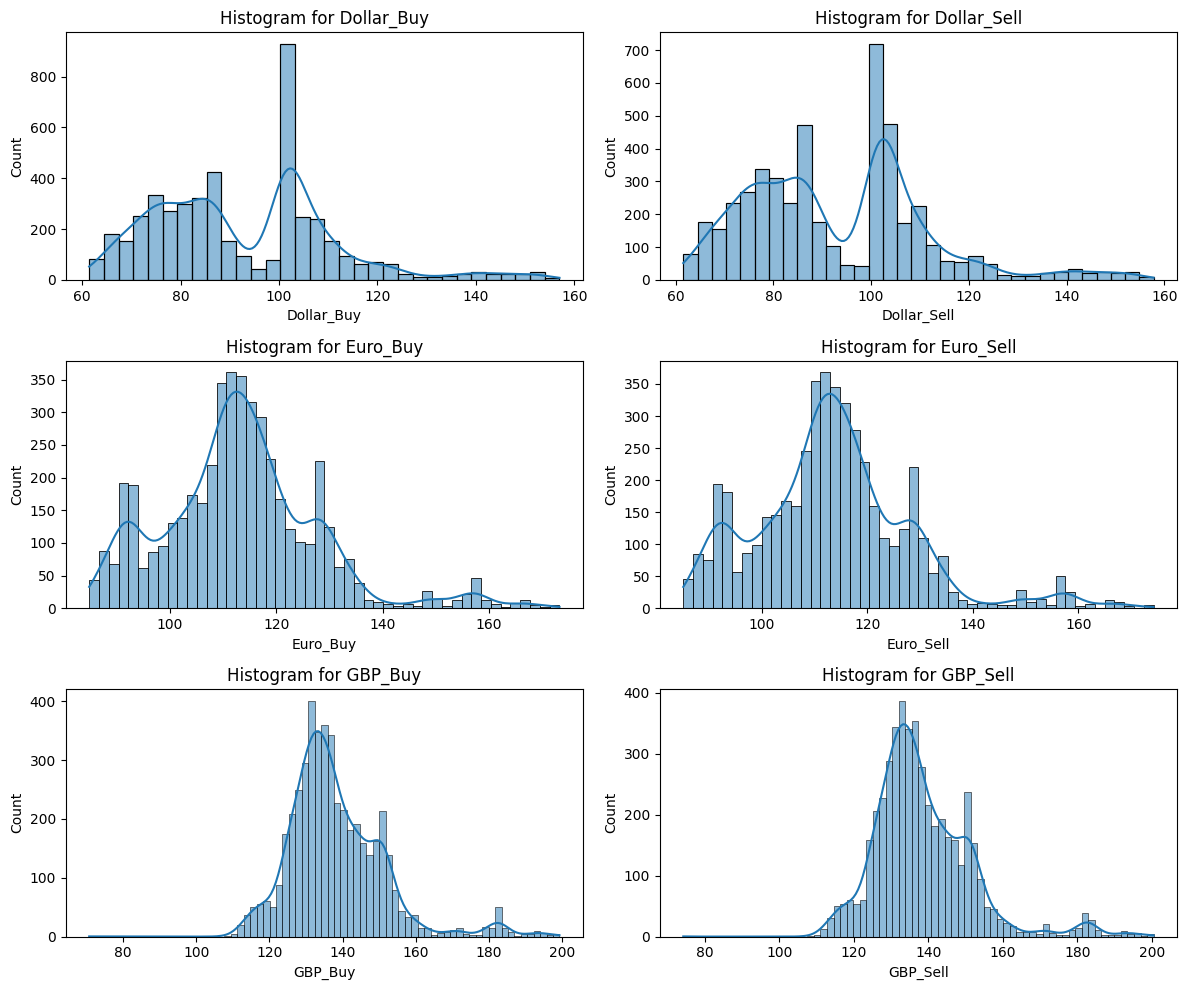

In [64]:
# Time Series Histogram and Density Plots

import warnings
warnings.filterwarnings('ignore')

# Create a figure and axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over columns and plot histograms
for i, column in enumerate(new_df.columns):
    sns.histplot(new_df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

The plot shows a distribution that doesn't exactly look Gaussian/Normal. The plotting function automatically selected the size of the bins based on the spread of values in the data here. Let's see what happens if we set the number of bins equal to 7.

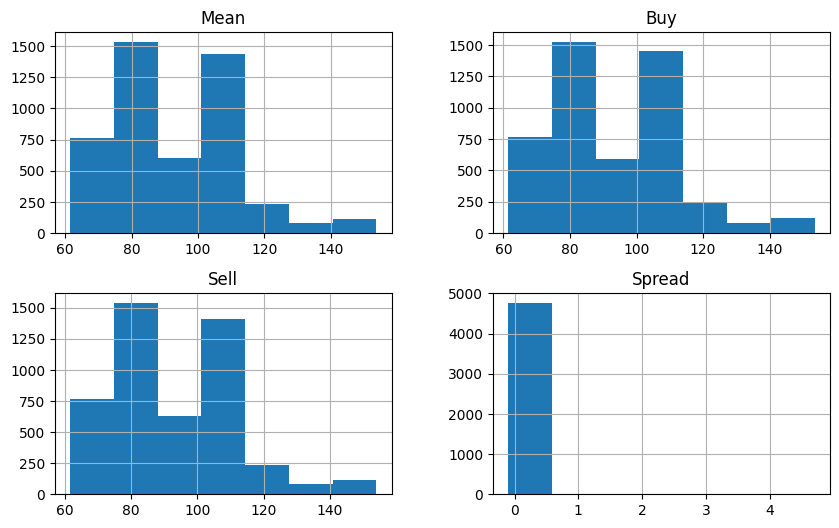

In [130]:
new_df.hist(figsize = (10,6), bins = 7);

This already looks more normal. With stock exchange returns, it is to be expected that on average, the returns will be 0 and have a Gaussian distribution around that. With only 6 years of monthly data, it is to be expected that the distribution does not exactly look Gaussian. 

We can also get a better idea of the shape of the distribution of observations by using a density plot which is like the histogram, except a function is used to fit the distribution of observations with smoothing to summarize this distribution.

Let's plot a density plot of the NYSE stock exchange data. We will achieve this by setting the `kind` parameter of the `plot()` method to `'kde'`, which stands for Kernel Density Estimation. 

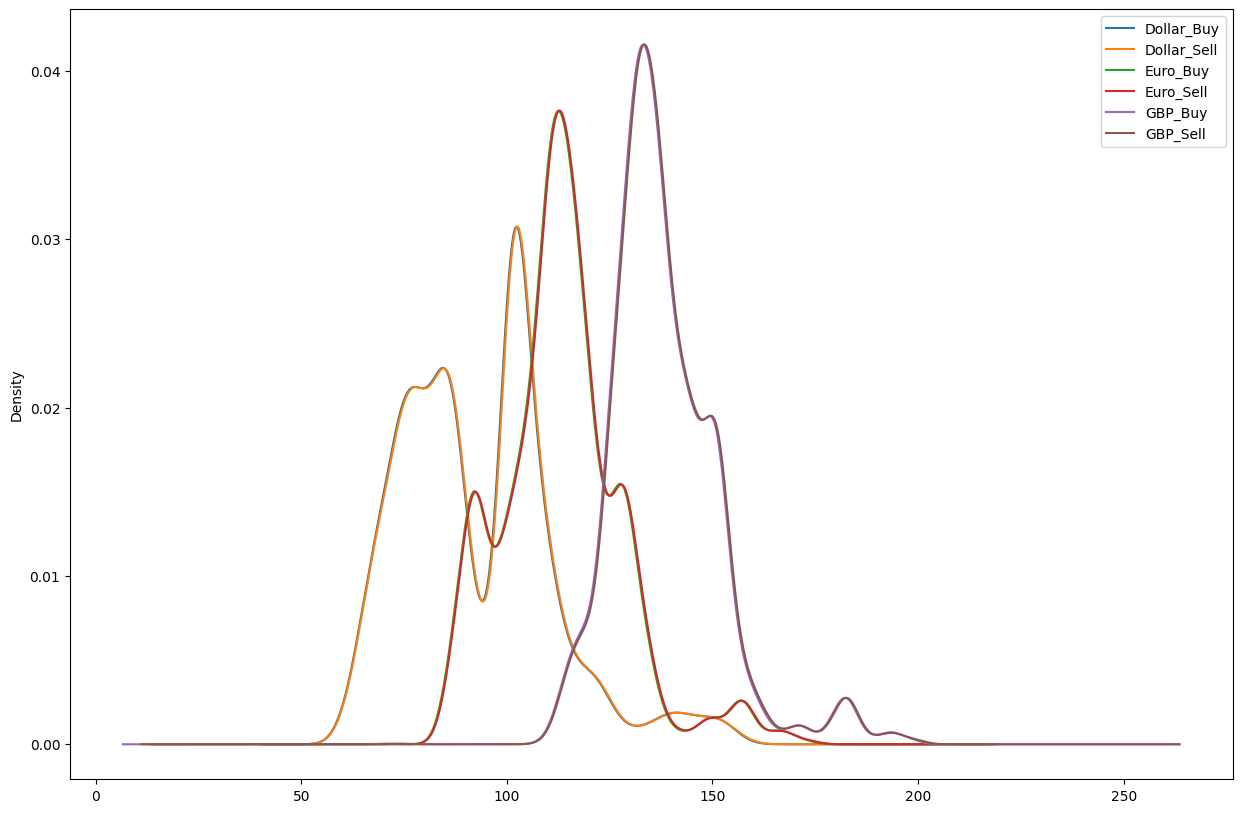

In [65]:
# Plot a density plot for dataset
new_df.plot(kind='kde', figsize = (15,10));

We can see that the density plot provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is more Gaussian than we were able to see in the histogram.

Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution.

## Time series box and whisker plots by year

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by **time interval**.

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extent of the observations. Dots are drawn for outliers outside the whiskers or extent of the data.

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

Let's use our groups by years DataFrame to plot a box and whisker plot for each year, side-by-side, for direct comparison using the `.boxplot()` method.

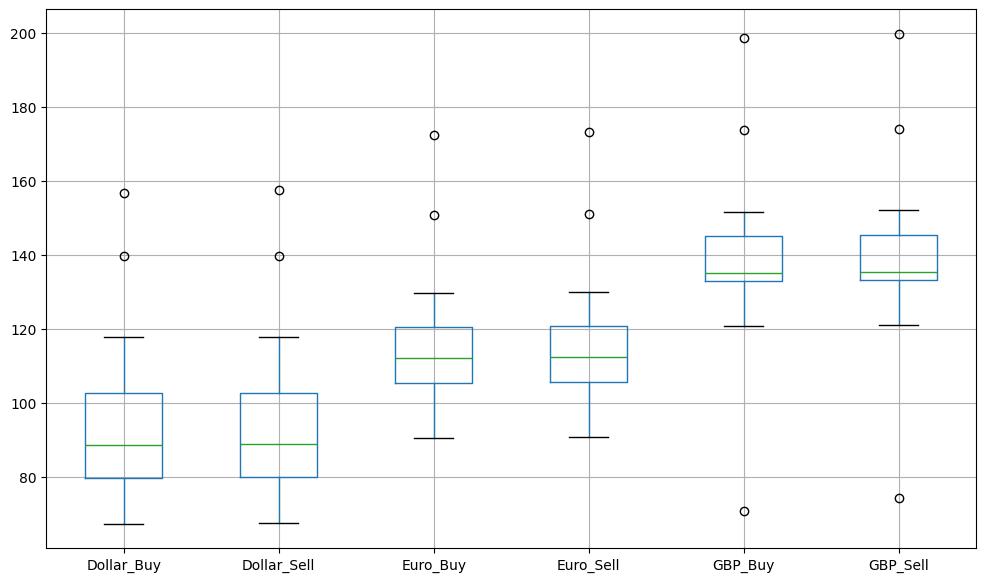

In [66]:
# Generate a box and whiskers plot for fx_annual
fx_annual.boxplot(figsize = (12,7));

Comparing box and whisker plots by consistent intervals is a useful tool. Within an interval, it can help to spot outliers (dots above or below the whiskers).

Across intervals, we can look for multiple year trends, seasonality, and other structural information that could be modeled. Seasonality is generally not a thing in financial data, but in the lab that follows you'll explore visualizing seasonal temperature data!

## Time series heat maps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color. This is called a heat map, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens). Like the box and whisker plots, we can compare observations between intervals using a heat map.

In the case of our NYSE dataset, the observations can be arranged into a matrix of year-columns and month-rows, with monthly returns in the cell for each day. A heat map of this matrix can then be plotted.

We'll now create a heatmap of the minimum daily temperatures data. The `matshow()` function from the matplotlib library is used as no heatmap support is provided directly in Pandas. In the following cell, we will: 

1. Rotate (transpose) the `nyse_annual` DataFrame as a new matrix so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.

2. Use [`matshow()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html) function to draw a heatmap for the transposed yearly matrix. 

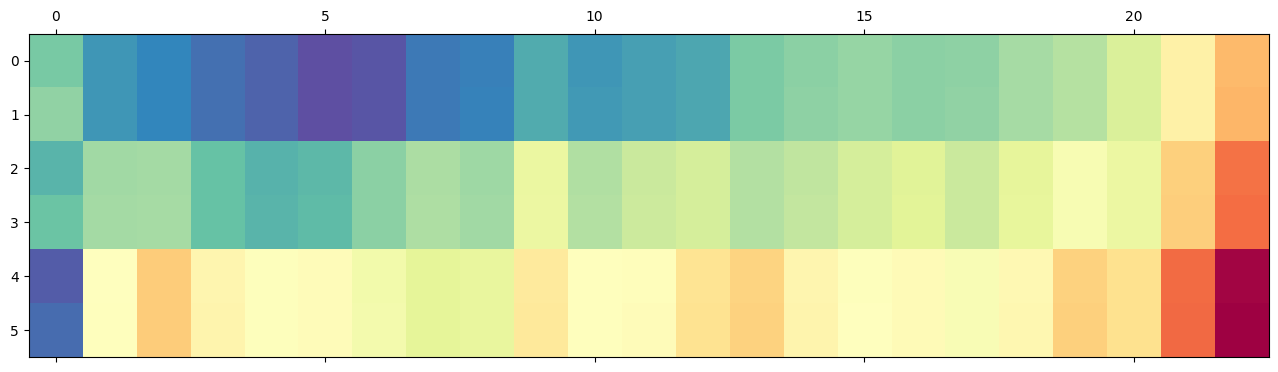

In [67]:
year_matrix = fx_annual.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

Orange/red colors represent higher values, blue represents low values, green represents values in the middle. Heat maps will make more sense after you've gone through the lab which will follow later and examine the Australian temperature data.

## Additional reading

- An overview of Pandas time series functionality can be found [here](https://pandas.pydata.org/pandas-docs/stable/timeseries.html).

- Some more manipulation tricks can be found [here](https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea).

## Summary

In this introductory lesson, we learned how to import and manipulate time series data in Python using Pandas. We learned how to fulfill all the requirements for a dataset to be classified as a time series by ensuring timestamp values as data index. Basic data handling techniques for getting time series data ready for further analysis were introduced. We also learned how to explore the temporal relationships with line and dot plots. We also explored the distribution of observations with histograms and density plots and change in distribution of observations with box and whisker and heat map plots.